In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import sys
sys.path.append("../")
from athena import query

In [3]:
# Returns a dataframe list of
query_1 = "SELECT * FROM \"fatiguem8_db\".\"ecg\" AS ecg \
           WHERE ecg.id LIKE '68fc1ba8befa66a396757ef874f40661' \
           AND ecg.session LIKE '1560726746.9893422' ORDER BY ecg.timestamp ASC"

In [4]:
df = query(query_1)

Execution ID: 28f4054d-75ef-4e3e-8640-3bf0fc1dee22
RUNNING
RUNNING
SUCCEEDED
Query "SELECT * FROM "fatiguem8_db"."ecg" AS ecg            WHERE ecg.id LIKE '68fc1ba8befa66a396757ef874f40661'            AND ecg.session LIKE '1560726746.9893422' ORDER BY ecg.timestamp ASC" finished.


In [5]:
signal = np.array(df["ecg_signal"])

In [6]:
sig_snippet = signal[60000:65000]

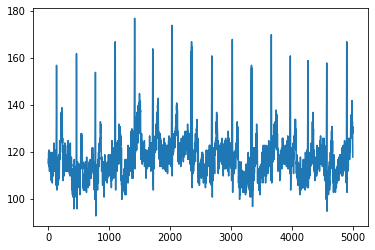

In [7]:
plt.plot(sig_snippet)

In [8]:
# Import peak detect and hrv analysis
from utils import peak_detection
from utils import calculate_hrv

In [9]:
peaks = peak_detection(sig_snippet)

In [10]:
def plot_peaks(peaks, signal):
    fig, ax = plt.subplots(figsize=(14, 4))
    y_peaks = [signal[x] for x in peaks]
    ax.plot(signal, 'g')
    ax.plot(peaks, y_peaks, 'ro')
    return fig, ax

(<Figure size 1008x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f60b5bc8dd8>)

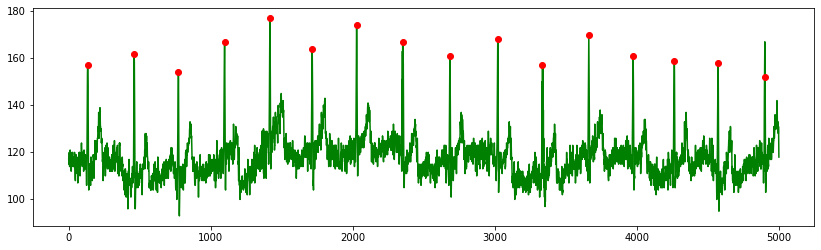

In [11]:
plot_peaks(peaks, sig_snippet)

In [12]:
calculate_hrv(peaks)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(12354.04, nan, 317666.67, 317906.8, 50.0)